In [1]:
import numpy as np 
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import time

The $SABA_{2}C = C(SABA_2)C$ intergrator of the Henon-Heiles Hamiltonian - we employ this to compute the Poincare surface of section.
This symplectic integrator is of order 4

In [2]:
start_time = time.time()
#integration of the Henon-Heiles system
N = 50000
a = 0
b = 25
h = 0.05#(b-a)/N
H = 1/8                             #the total energy of the system

In [3]:
#intialize vectors
x_c1 = np.zeros(N, dtype = 'float')
y_c1 = np.zeros(N, dtype = 'float')
px_d1 = np.zeros(N, dtype = 'float')
py_d1 = np.zeros(N, dtype = 'float')
x_c2 = np.zeros(N, dtype = 'float')
y_c2 = np.zeros(N, dtype = 'float')
px_c = np.zeros(N, dtype = 'float')
py_c = np.zeros(N, dtype = 'float')
H_new = np.zeros(N, dtype = 'float')
error = np.zeros(N, dtype = 'float')

In [4]:
#intialize vectors
x_c1_new = np.zeros(N, dtype = 'float')
y_c1_new = np.zeros(N, dtype = 'float')
px_d1_new = np.zeros(N, dtype = 'float')
py_d1_new = np.zeros(N, dtype = 'float')
x_c2_new = np.zeros(N, dtype = 'float')
y_c2_new = np.zeros(N, dtype = 'float')
px_c_new = np.zeros(N, dtype = 'float')
py_c_new = np.zeros(N, dtype = 'float') 

In [5]:
#set intial conditions 
#x0 = 0
#y0 = -0.25
#py0 = 0

#set initial conditions of the deviation vectors
dx0=1
dy0 = 0
dpx0 = 0
dpy0 = 0
#define dunction to find px0
def initial_px(x0, y0, py0):
    return np.sqrt(2*H - py0**2  - y0**2 - 2*x0**2*y0 + (2/3)*y0**2)


In [6]:
#set the integration constants
c1 = 1/2 - np.sqrt(3)/6
c2 = np.sqrt(3)/3
d1 = 1/2
c = (2 - np.sqrt(3))/24

In [23]:
#y values
y_vals = np.linspace(-0.3, 0.3, 100)
py_vals = np.linspace(-0.1, 0.1, 100)
x_vals = np.linspace(-0.1, 0.1, 100)

In [24]:
#select step size for PSS
deltax = 0.001

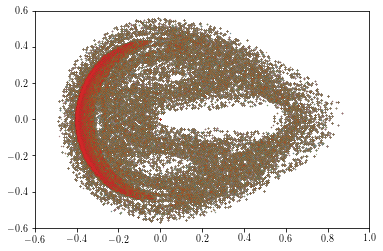

In [27]:
i = 0
for val in range(len(y_vals)):
    y0= y_vals[val]
    x0= 0#x_vals[val]
    py0= 0#py_vals[val]
    px0 = initial_px(x0, y0, py0)
    for i in range(N-1):
        #filling the first entries
        px_c[0] = px0
        py_c[0] = py0
        x_c1[0] = x0
        y_c1[0] = y0
    
        px_c[i+1] = px_c[i] + c*(h**3)*x_c1[i]*(1 + 2*x_c1[i]**2 + 6*y_c1[i]  + 2*y_c1[i]**2)
        py_c[i+1] = py_c[i] + c*(h**3)*(y_c1[i] - 3*y_c1[i]**2 + 2*y_c1[i]**3 + 3*x_c1[i]**2 + 2*(x_c1[i]**2)*y_c1[i])
    
    
        x_c1[i+1] = x_c1[i] + c1*h*px_c[i+1]
        y_c1[i+1] = y_c1[i] + c1*h*py_c[i+1]
    
    
        px_d1[i] = px_c[i+1] - d1*h*x_c1[i+1]*(1 + 2*y_c1[i+1])
        py_d1[i] = py_c[i+1] + d1*h*(y_c1[i+1]**2 - x_c1[i+1]**2  - y_c1[i+1])
    
    
        x_c2[i] = x_c1[i+1] + c2*h*px_d1[i]
        y_c2[i] = y_c1[i+1] + c2*h*py_d1[i]
    
    
        px_d1[i+1] = px_d1[i] - d1*h*x_c2[i]*(1 + 2*y_c2[i])
        py_d1[i+1] = py_d1[i] + d1*h*(y_c2[i]**2 - x_c2[i]**2  - y_c2[i])
    
    
        x_c1[i+1] = x_c2[i] + c1*h*px_d1[i+1]
        y_c1[i+1] = y_c2[i] + c1*h*py_d1[i+1]
    
        px_c[i+1] = px_d1[i+1] + c*(h**3)*x_c1[i+1]*(1 + 2*x_c1[i+1]**2 + 6*y_c1[i+1]  + 2*y_c1[i+1]**2)
        py_c[i+1] = py_d1[i+1] + c*(h**3)*(y_c1[i+1] - 3*y_c1[i+1]**2 + 2*y_c1[i+1]**3 + 3*x_c1[i+1]**2 + 2*(x_c1[i+1]**2)*y_c1[i+1])
    
        H_new[i] = (1/2)*(px_d1[i+1]**2 + py_d1[i+1]**2) + (1/2)*(x_c1[i+1]**2 + y_c1[i+1]**2) + x_c1[i+1]**2 *y_c1[i+1] - (1/3)*y_c1[i+1]**3
        error[i] = abs(H_new[i] - H)
    
        #handle computations for the Poincare Surface of Section
        if x_c1[i]*x_c1[i+1]<0 and (x_c1[i]>0) :
            #x_c1[i] = x_c1[i]
            #x_c1[i+1] = x_c1[i+1]
            #xnew_half[i] = x[i] + (-abs(x[i+1] - x[i])/2)*px_new[i]*(1/x[i+1])
            deltax = deltax/(10**(15))
            px_c_new[i] = px_c[i] + (deltax**3)*c*x_c1[i+1]*(1 + 2*x_c1[i+1]**2 + 6*y_c1[i+1]  + 2*y_c1[i+1]**2)/px_c[i+1]
            py_c_new[i] = py_c[i] + (deltax**3)*c*(y_c1[i+1] - 3*y_c1[i+1]**2 + 2*y_c1[i+1]**3 + 3*x_c1[i+1]**2 + 2*(x_c1[i+1]**2)*y_c1[i+1])/px_c[i+1]
        
            x_c1_new[i] = x_c1[i] + deltax*c1*px_c[i+1]/px_c[i+1]
            y_c1_new[i] = y_c1[i] + deltax*c1*py_c[i+1]/px_c[i+1]
            if abs((H_new[i] - H)/H)<10**(-3):
                break
        i+=1
    else:
        plt.scatter(y_c1_new, py_c_new, s=0.01)
        plt.ylim(-0.6, 0.6)
        plt.xlim(-0.6, 1)

    
    

    
    

In [28]:
end_time = time.time() - start_time
end_time

54865.260618925095

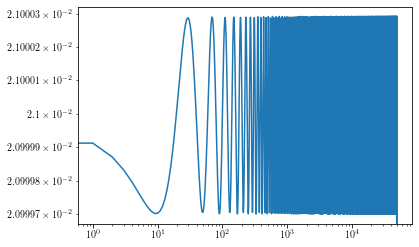

In [19]:
plt.loglog(np.linspace(0, N, N), error)

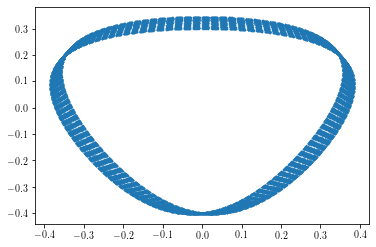

In [20]:
plt.scatter(x_c1, y_c1, s=0.1)

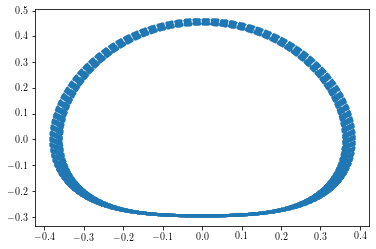

In [21]:
plt.scatter(x_c1, px_c, s=0.1)

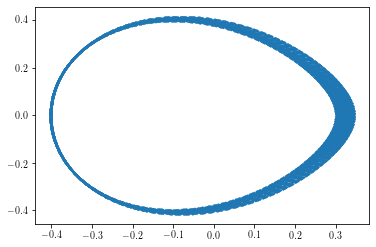

In [22]:
plt.scatter(y_c1, py_c, s=0.1)